In [78]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [5]:
red_wine=pd.read_csv('red_wine.csv')

In [7]:
red_wine.head(3)

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high


In [11]:
red_wine.describe()

,citric acid,sulphates,alcohol
count,571.000000,571.000000,571.000000
mean,0.324676,0.588161,10.776883
std,0.175103,0.188478,1.092562
min,0.000000,0.250000,8.000000
25%,0.240000,0.450000,9.900000
50%,0.330000,0.570000,10.800000
75%,0.440000,0.710000,11.600000
max,1.000000,2.000000,12.800000


# ML Models

In [49]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
red_wine=pd.read_csv('red_wine.csv')

In [3]:
#one hot encoding
label_encoder = preprocessing.LabelEncoder()

red_wine['type']= label_encoder.fit_transform(red_wine['type']) 

red_wine.head(10)
#low=1
#high=0

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.00,1
1,0.66,0.57,8.30,1
2,0.23,0.44,8.50,0
3,0.44,0.84,8.60,1
4,0.08,0.50,8.70,1
5,0.26,0.53,8.70,1
6,0.20,0.43,8.75,1
7,0.03,0.33,8.80,1
8,0.19,0.35,8.80,0
9,0.62,0.49,8.80,0


In [4]:
red_wine.type.unique()

array([1, 0])

In [5]:
red_wine.type.value_counts()

0    302
1    269
Name: type, dtype: int64

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 15.7 KB


In [7]:
X=red_wine[['citric acid','sulphates','alcohol']]
y=red_wine['type']

In [50]:
#Class for checking all the models  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
   
class Classification:
    def logistic_regression(self,X,y):
        X.self=X
        y.self=y
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        auc_log = metrics.roc_auc_score(y_test, y_pred)
        acc_log = metrics.accuracy_score(y_test, y_pred)
        model=logreg
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        return (f"Accuracy of the LR classifier is: {acc_log}",'AUC for logistic regression: {:.2f}'.format(auc_log),'CV Scores: ',scores)        
    def naive_bayes(self,X,y):
        X.self=X
        y.self=y
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)  #import all first before u run
        y_pred = gnb.predict(X_test)
        auc_nb = metrics.roc_auc_score(y_test, y_pred)
        acc_nb = metrics.accuracy_score(y_test, y_pred)
        model=gnb
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        return (f"Accuracy of the NB classifier is: {acc_nb}",'AUC for NB: {:.2f}'.format(auc_nb),'CV Scores: ',scores)        
    def svm(self,X,y): # can give test size
        X.self=X
        y.self=y
        clf = SVC(kernel='linear')
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        auc_svm = metrics.roc_auc_score(y_test, y_pred)
        acc_svm = metrics.accuracy_score(y_test, y_pred)
        model=clf
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        return (f"Accuracy of the SVM classifier is: {acc_svm}",'AUC for SVM: {:.2f}'.format(auc_svm),'CV Scores: ',scores)
    def random_forest(self,X,y):
        X.self=X
        y.self=y
        clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, y_train) 
        prediction = clf.predict(X_test)
        auc_rf = metrics.roc_auc_score(y_test, prediction)
        acc_rf = metrics.accuracy_score(y_test, prediction)
        model=clf
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        return (f"Accuracy of the RF classifier is: {acc_rf}",'AUC for SVM: {:.2f}'.format(auc_rf),'CV Scores: ',scores)
    def decision_tree(self,X,y):
        X.self=X
        y.self=y
        classifier = DecisionTreeClassifier()
        classifier = classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        auc_dt = metrics.roc_auc_score(y_test, y_pred)
        acc_dt = metrics.accuracy_score(y_test, y_pred)
        model=classifier
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        return (f"Accuracy of the DT classifier is: {acc_dt}",'AUC for DT: {:.2f}'.format(auc_dt),'CV Scores: ',scores)
        

In [51]:
# checking the auc, and accuracy of all the models

print("LOGISTIC REGRESSION")
log_reg=Classification()
print(log_reg.logistic_regression(X,y))
print("*********************************")
print("NAIVE BAYES")
naive_bayes=Classification()
print(naive_bayes.naive_bayes(X,y))
print("*********************************")
print("SUPPORT VECTOR MACHINE")
svm=Classification()
print(svm.svm(X,y))
print("*********************************")
print("RANDOM FOREST")
rf=Classification()
print(rf.random_forest(X,y))
print("*********************************")
print("DECISION TREE")
dt=Classification()
print(dt.decision_tree(X,y))
print("*********************************")



LOGISTIC REGRESSION
('Accuracy of the LR classifier is: 0.7906976744186046', 'AUC for logistic regression: 0.79', 'CV Scores: ', array([0.77586207, 0.8245614 , 0.75438596, 0.84210526, 0.59649123,
       0.8245614 , 0.78947368, 0.77192982, 0.89473684, 0.77192982]))
*********************************
NAIVE BAYES
('Accuracy of the NB classifier is: 0.8313953488372093', 'AUC for NB: 0.83', 'CV Scores: ', array([0.84482759, 0.87719298, 0.78947368, 0.87719298, 0.68421053,
       0.9122807 , 0.77192982, 0.80701754, 0.87719298, 0.80701754]))
*********************************
SUPPORT VECTOR MACHINE
('Accuracy of the SVM classifier is: 0.7906976744186046', 'AUC for SVM: 0.79', 'CV Scores: ', array([0.77586207, 0.77192982, 0.77192982, 0.89473684, 0.61403509,
       0.85964912, 0.75438596, 0.78947368, 0.89473684, 0.77192982]))
*********************************
RANDOM FOREST
('Accuracy of the RF classifier is: 0.8488372093023255', 'AUC for SVM: 0.85', 'CV Scores: ', array([0.86206897, 0.85964912, 0.

Random Forest

In [176]:
red_wine.shape

(571, 4)

In [55]:
# ROC Curve for Random Forest Classifier:

clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, y_train) 
prediction = clf.predict(X_test)
auc_rf = metrics.roc_auc_score(y_test, prediction)
acc_rf = metrics.accuracy_score(y_test, prediction)
model=clf
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print (f"Accuracy of the Random Forest classifier is: {acc_rf}",'AUC for Random Forest: {:.2f}'.format(auc_rf),'CV Scores: ',scores)
    

Accuracy of the RF classifier is: 0.8488372093023255 AUC for SVM: 0.85 CV Scores:  [0.86206897 0.85964912 0.87719298 0.84210526 0.68421053 0.84210526
 0.84210526 0.8245614  0.87719298 0.84210526]


In [54]:
rf=Classification()
print(rf.random_forest(X,y))


('Accuracy of the RF classifier is: 0.8488372093023255', 'AUC for SVM: 0.85', 'CV Scores: ', array([0.86206897, 0.85964912, 0.87719298, 0.84210526, 0.68421053,
       0.84210526, 0.84210526, 0.8245614 , 0.87719298, 0.84210526]))


ROC AUC=0.85


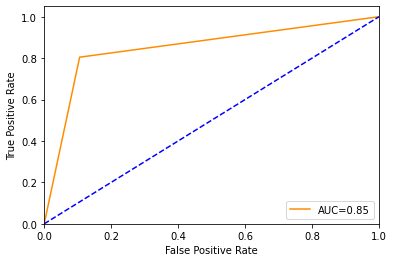

In [58]:
# ROC Curve for RF 


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split

def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
plot_roc(y_test,prediction)


In [59]:
# best model is Random forest classifier - testing on white wine
white_wine=pd.read_csv('white_wine.csv')

In [60]:
white_wine.shape

(78, 4)

In [61]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  78 non-null     float64
 1   sulphates    78 non-null     float64
 2   alcohol      78 non-null     float64
 3   type         78 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.6+ KB


In [63]:
white_wine.head(10)

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low
5,0.00,0.37,10.1,low
6,0.42,0.32,12.8,high
7,0.26,0.34,12.8,high
8,0.48,0.39,12.8,high
9,0.43,0.59,12.8,high


In [64]:
# one hot encoding for white wine

label_encoder = preprocessing.LabelEncoder()
 
white_wine['type']= label_encoder.fit_transform(white_wine['type']) 

white_wine.head(10)
#low=1
#high=0

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,1
1,0.49,0.56,9.4,1
2,0.66,0.73,10.0,1
3,0.32,0.77,10.0,1
4,0.38,0.82,10.0,1
5,0.00,0.37,10.1,1
6,0.42,0.32,12.8,0
7,0.26,0.34,12.8,0
8,0.48,0.39,12.8,0
9,0.43,0.59,12.8,0


In [65]:
white_wine.type.value_counts()  

0    61
1    17
Name: type, dtype: int64

In [66]:
X=white_wine[['citric acid','sulphates','alcohol']]
y=white_wine['type']

In [67]:
# train test 70-30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, y_train) 
prediction = clf.predict(X_test)
auc_rf = metrics.roc_auc_score(y_test, prediction)
acc_rf = metrics.accuracy_score(y_test, prediction)
model=clf
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy of the RF classifier is: {:.2f} ".format(acc_rf))
print('*******************************************')
print('AUC for Random Forest: {:.2f}'.format(auc_rf))
print('*******************************************')
print('CV Scores: \n',scores)
    

Accuracy of the RF classifier is: 0.92 
*******************************************
AUC for RF: 0.89
*******************************************
CV Scores: 
 [0.875      0.875      1.         1.         1.         0.875
 0.75       0.875      0.85714286 1.        ]
